- Standardization Python Implementation
- Min Max Scaling
- Robust Scaling
- Nominal Vs Ordinal Variables and One Hot Encoding


### Standardization (Z-Score Scaling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.DataFrame({'h':[150,160,170,180,190],
                  'w':[50,60,70,80,90]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [7]:
m=df.mean()
s=df.std()
print(s)

z=(df-m)/s
z.round(2)


h    15.811388
w    15.811388
dtype: float64


,h,w
0,-1.26,-1.26
1,-0.63,-0.63
2,0.00,0.00
3,0.63,0.63
4,1.26,1.26


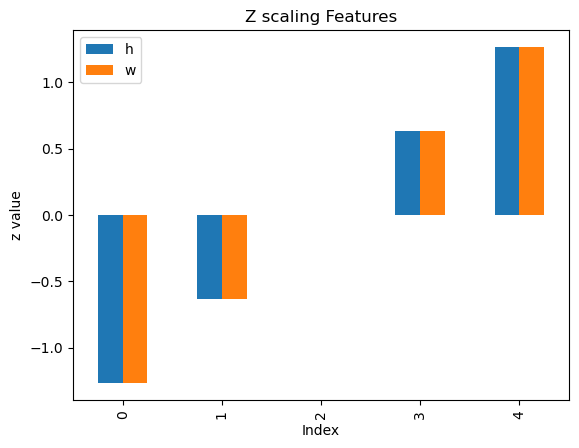

In [8]:
z.plot(kind='bar')
plt.title("Z scaling Features")
plt.xlabel("Index")
plt.ylabel("z value")
plt.show()

### Min Max Scaling

In [9]:
df= pd.DataFrame({'h':[150,160,170,180,190],
                  'w':[50,60,70,80,90]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [12]:
# Step-1: Min ,Max,Range

mn=df.min()
mx= df.max()
rg=mx-mn
mn,mx,rg

(h    150
 w     50
 dtype: int64,
 h    190
 w     90
 dtype: int64,
 h    40
 w    40
 dtype: int64)

In [15]:
# Step-2: Shift to zero

ss=df- mn
ss.head()

,h,w
0,0,0
1,10,10
2,20,20
3,30,30
4,40,40


In [16]:
# Step-3 : Divide by range
mm=ss/rg
mm.round(2)

,h,w
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


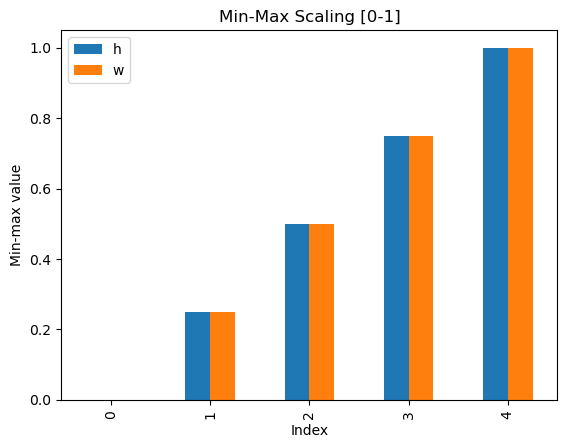

In [19]:
# Plot

mm.plot(kind='bar')
plt.title("Min-Max Scaling [0-1]")
plt.xlabel("Index"); plt.ylabel('Min-max value')
plt.show()

### Robust Scaling

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'h':[150,160,170,180,300],
                   'w':[50,60,70,80,200]})
df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [22]:
# step 1: median, quartiles, IQR

md =df.median()
q1=df.quantile(.25)
q3 =df.quantile(.75)
iqr = q3-q1
md,q1,q3,iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [23]:
# step 2: center by median
ct = df - md
ct

,h,w
0,-20.0,-20.0
1,-10.0,-10.0
2,0.0,0.0
3,10.0,10.0
4,130.0,130.0


In [24]:
# step 3: divide by IQR
rb = ct/iqr
rb.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


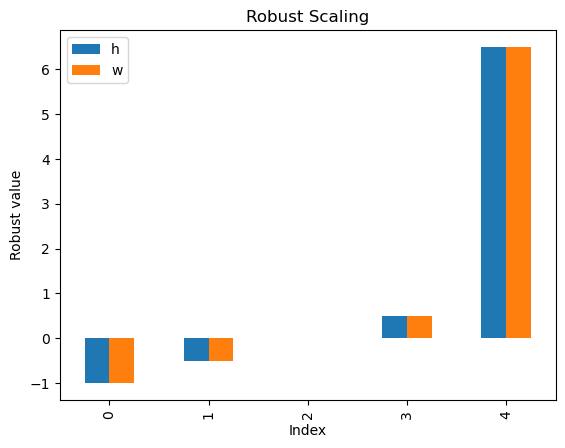

In [25]:
# visualize robust scaled values
rb.plot(kind='bar')
plt.title("Robust Scaling")
plt.xlabel("Index"); plt.ylabel('Robust value')
plt.show()

In [26]:
# standardization/z score
m = df.mean()
s = df.std()
z = (df - m) / s

# min max
mn = df.min()
mx = df.max()
mm = (df - mn) / (mx - mn)

# side-by-side
out = pd.concat([df,
                 z.add_prefix('z_'),
                 mm.add_prefix('mm_'),
                 rb.add_prefix('rb_')], axis=1)
out.round(2)


,h,w,z_h,z_w,mm_h,mm_w,rb_h,rb_w
0,150,50,-0.68,-0.68,0.00,0.00,-1.0,-1.0
1,160,60,-0.52,-0.52,0.07,0.07,-0.5,-0.5
2,170,70,-0.36,-0.36,0.13,0.13,0.0,0.0
3,180,80,-0.20,-0.20,0.20,0.20,0.5,0.5
4,300,200,1.76,1.76,1.00,1.00,6.5,6.5


### One Hot Encoding

In [28]:
import pandas as pd

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})
   

In [29]:
# Step 2: Apply one-hot encoding to the 'color' column
d_color = pd.get_dummies(df["color"], prefix="C", dtype = int)

In [30]:
# Step 3: Combine the new columns back with the original data
df_encoded = pd.concat([df,d_color], axis = 1)

In [31]:
# Step 4: Drop the old 'color' column if you no longer need it
df_encoded = df_encoded.drop("color", axis = 1)
print(df_encoded)

   id    size  price  C_blue  C_green  C_red
0   1   Small     10       0        0      1
1   2  Medium     12       1        0      0
2   3   Large     15       0        1      0
3   4  Medium     11       0        0      1


### Ordinal Encoding (for ordered categories)

In [32]:
import pandas as pd

df = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,15,11]
})
df

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [33]:
# Step 2: declare the ordinal order
order = {"Small":1,"Medium":2,"Large":3}

In [34]:
# Step 3: convert the whole feature
# df["size_encoded"]=df["size"].map(order).astype(int)
df["size"]=df["size"].map(order).astype(int)

In [35]:
df

,id,color,size,price
0,1,red,1,10
1,2,blue,2,12
2,3,green,3,15
3,4,red,2,11
